### Import Libraries

In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import requests
import urllib.request

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

Solving environment: ...working... done

# All requested packages already installed.



### Download and Explore Dataset

In [7]:
import requests
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json'
doc = requests.get(url)
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [8]:
ny_data = newyork_data['features']

In [9]:
ny_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

### Transform the data into pandas dataframe

In [10]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
ny_df = pd.DataFrame(columns=column_names)

In [11]:
ny_df

,Borough,Neighborhood,Latitude,Longitude


### Loop through the data and fill the dataframe one row at a time

In [12]:
for data in ny_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_df = ny_df.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [13]:
ny_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [14]:
ny_df.shape

(306, 4)

In [15]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(ny_df['Borough'].unique()),
        ny_df.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


### Use geopy library to get the latitude and longitude values of New York City

In [16]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### Create a map of New York with neighborhoods superimposed on top

In [17]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ny_df['Latitude'], ny_df['Longitude'], ny_df['Borough'], ny_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [18]:
ny_df['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

### Let's explore one Borough at a time

## Bronx

In [19]:
bronx_df = ny_df[ny_df['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [20]:
bronx_df.shape

(52, 4)

In [21]:
bronx_address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(bronx_address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.7896239, -73.9598939.


In [22]:
# create map of Manhattan using latitude and longitude values
map_bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(bronx_df['Latitude'], bronx_df['Longitude'], bronx_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

### Define Foursquare Credentials and Version

In [23]:
CLIENT_ID = 'S54YGPMLB5GOJC5LIZ4MUJSRRPFO5KUCTIVZNKKTZUNZ020J' # your Foursquare ID
CLIENT_SECRET = 'OYKT2D31TKZG4CVT2GERKQWN1B01ZHMELYONHOB0PPSUTQTD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S54YGPMLB5GOJC5LIZ4MUJSRRPFO5KUCTIVZNKKTZUNZ020J
CLIENT_SECRET:OYKT2D31TKZG4CVT2GERKQWN1B01ZHMELYONHOB0PPSUTQTD


In [24]:
ny_latitude = ny_df.loc[0, 'Latitude'] # neighborhood latitude value
ny_longitude = ny_df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = ny_df.loc[0, 'Neighborhood'] # neighborhood name

### Top 100 venues in NY

In [25]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ny_latitude, 
    ny_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=S54YGPMLB5GOJC5LIZ4MUJSRRPFO5KUCTIVZNKKTZUNZ020J&client_secret=OYKT2D31TKZG4CVT2GERKQWN1B01ZHMELYONHOB0PPSUTQTD&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

In [26]:
ny_results = requests.get(url).json()
ny_results

{'meta': {'code': 200, 'requestId': '6006fbf0884093478767bbff'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLn

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Clean the json file and structure it into pandas dataframe

In [28]:
ny_venues = ny_results['response']['groups'][0]['items']
    
nearby_ny_venues = json_normalize(ny_venues) # flatten JSON

# filter columns
ny_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_ny_venues =nearby_ny_venues.loc[:, ny_filtered_columns]

# filter the category for each row
nearby_ny_venues['venue.categories'] = nearby_ny_venues.apply(get_category_type, axis=1)

# clean columns
nearby_ny_venues.columns = [col.split(".")[-1] for col in nearby_ny_venues.columns]

nearby_ny_venues.head()

<ipython-input-28-019210d50e50>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_ny_venues = json_normalize(ny_venues) # flatten JSON


,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Rite Aid,Pharmacy,40.896649,-73.844846
2,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
3,Walgreens,Pharmacy,40.896528,-73.844700
4,Dunkin',Donut Shop,40.890459,-73.849089


In [29]:
print('{} venues were returned by Foursquare.'.format(nearby_ny_venues.shape[0]))

8 venues were returned by Foursquare.


### Let's create a function to repeat the same process to all the neighborhoods in New York

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Run the above function on each neighborhood in NY

In [31]:
ny_venues = getNearbyVenues(names=ny_df['Neighborhood'],
                                   latitudes=ny_df['Latitude'],
                                   longitudes=ny_df['Longitude']
                                  )

In [32]:
print(ny_venues.shape)
ny_venues.head()

(10120, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [33]:
ny_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,29,29,29,29,29,29
Annadale,11,11,11,11,11,11
Arden Heights,4,4,4,4,4,4
Arlington,6,6,6,6,6,6
Arrochar,22,22,22,22,22,22
Arverne,20,20,20,20,20,20
Astoria,100,100,100,100,100,100
Astoria Heights,12,12,12,12,12,12
Auburndale,17,17,17,17,17,17


In [34]:
print('There are {} uniques categories.'.format(len(ny_venues['Venue Category'].unique())))

There are 436 uniques categories.


### Analyze Each Neighborhood

In [35]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()

,Yoga Studio,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle Ho

In [36]:
ny_onehot.shape

(10120, 436)

### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
## Doubt - why are we using mean and not count?

In [110]:
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()
ny_grouped.head()

,Neighborhood,Yoga Studio,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle Ho

In [38]:
ny_grouped.shape

(302, 436)

### Print each neighborhood along with the top 5 most common venues

In [113]:
ny_num_top_venues = 5

for hood in ny_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ny_grouped[ny_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(ny_num_top_venues))
    print('\n')

----Allerton----
                venue  freq
0         Pizza Place  0.17
1                 Spa  0.07
2       Deli / Bodega  0.07
3         Supermarket  0.07
4  Chinese Restaurant  0.03


----Annadale----
                 venue  freq
0  American Restaurant  0.27
1          Pizza Place  0.27
2                 Food  0.09
3        Train Station  0.09
4                Diner  0.09


----Arden Heights----
           venue  freq
0  Deli / Bodega  0.25
1    Pizza Place  0.25
2    Coffee Shop  0.25
3       Pharmacy  0.25
4    Yoga Studio  0.00


----Arlington----
           venue  freq
0       Bus Stop  0.33
1   Intersection  0.17
2  Deli / Bodega  0.17
3  Boat or Ferry  0.17
4   Food Service  0.17


----Arrochar----
                   venue  freq
0          Deli / Bodega  0.09
1               Bus Stop  0.09
2            Pizza Place  0.09
3     Italian Restaurant  0.09
4  Outdoors & Recreation  0.05


----Arverne----
            venue  freq
0       Surf Spot  0.20
1   Metro Station  0.10
2  Sand

4     Bubble Tea Shop  0.03


----City Island----
                    venue  freq
0           Boat or Ferry  0.07
1           Deli / Bodega  0.07
2      Seafood Restaurant  0.07
3  Thrift / Vintage Store  0.07
4                   Diner  0.04


----City Line----
           venue  freq
0     Donut Shop  0.09
1    Flower Shop  0.06
2  Grocery Store  0.06
3     Shoe Store  0.06
4   Dance Studio  0.03


----Civic Center----
                  venue  freq
0           Coffee Shop  0.08
1                   Spa  0.05
2  Gym / Fitness Center  0.05
3          Cocktail Bar  0.04
4     French Restaurant  0.04


----Claremont Village----
           venue  freq
0  Grocery Store  0.18
1    Bus Station  0.18
2         Bakery  0.12
3      Gift Shop  0.06
4           Park  0.06


----Clason Point----
                       venue  freq
0                       Park   0.4
1                       Pool   0.1
2          Convenience Store   0.1
3                   Bus Stop   0.1
4  South American Restaurant   0.

              venue  freq
0               Bar  0.14
1   Harbor / Marina  0.10
2       Pizza Place  0.10
3  Department Store  0.05
4              Café  0.05


----Glen Oaks----
           venue  freq
0       Pharmacy  0.15
1    Pizza Place  0.05
2           Park  0.05
3     Bagel Shop  0.05
4  Grocery Store  0.05


----Glendale----
                 venue  freq
0         Dance Studio  0.14
1          Bus Station  0.14
2          Pizza Place  0.14
3    Food & Drink Shop  0.14
4  Arts & Crafts Store  0.14


----Gowanus----
                    venue  freq
0      Italian Restaurant  0.05
1             Pizza Place  0.05
2                     Bar  0.05
3  Furniture / Home Store  0.05
4             Art Gallery  0.03


----Gramercy----
                 venue  freq
0           Bagel Shop  0.06
1                  Bar  0.06
2          Pizza Place  0.05
3  American Restaurant  0.05
4         Cocktail Bar  0.03


----Graniteville----
           venue  freq
0     Food Truck  0.25
1       Bus Stop  0.2

4      Grocery Store  0.06


----Melrose----
                  venue  freq
0           Pizza Place  0.11
1              Pharmacy  0.11
2         Grocery Store  0.07
3  Gym / Fitness Center  0.07
4        Discount Store  0.07


----Middle Village----
                       venue  freq
0  South American Restaurant  0.07
1                 Sports Bar  0.07
2                     Bakery  0.07
3                       Bank  0.07
4         Spanish Restaurant  0.07


----Midland Beach----
                venue  freq
0               Beach  0.18
1           Bookstore  0.09
2  Russian Restaurant  0.09
3  Chinese Restaurant  0.09
4                Food  0.09


----Midtown----
                 venue  freq
0                Hotel  0.09
1       Clothing Store  0.06
2          Coffee Shop  0.05
3              Theater  0.04
4  Sporting Goods Shop  0.03


----Midtown South----
                 venue  freq
0    Korean Restaurant  0.18
1                Hotel  0.07
2  Japanese Restaurant  0.04
3  American Rest

4                       Bank  0.08


----Richmond Town----
                venue  freq
0  Italian Restaurant  0.25
1          Bagel Shop  0.25
2                 Spa  0.25
3                Café  0.25
4         Yoga Studio  0.00


----Richmond Valley----
                        venue  freq
0                        Bank  0.18
1        Fast Food Restaurant  0.18
2             Bubble Tea Shop  0.09
3  Construction & Landscaping  0.09
4               Train Station  0.09


----Ridgewood----
           venue  freq
0           Bank  0.08
1  Deli / Bodega  0.08
2  Grocery Store  0.08
3         Bakery  0.08
4       Pharmacy  0.05


----Riverdale----
            venue  freq
0            Park   0.2
1  Baseball Field   0.1
2     Bus Station   0.1
3      Playground   0.1
4   Moving Target   0.1


----Rochdale----
                             venue  freq
0                           Market  0.13
1  Southern / Soul Food Restaurant  0.13
2                             Bank  0.07
3                      Can

                venue  freq
0                 Bar  0.05
1  Italian Restaurant  0.05
2            Wine Bar  0.05
3              Bakery  0.05
4         Coffee Shop  0.04


----Utopia----
                       venue  freq
0              Deli / Bodega  0.12
1           Basketball Court  0.12
2                 Donut Shop  0.06
3                        Spa  0.06
4  South American Restaurant  0.06


----Van Nest----
           venue  freq
0    Pizza Place  0.21
1  Deli / Bodega  0.11
2    Bus Station  0.11
3    Coffee Shop  0.05
4      BBQ Joint  0.05


----Vinegar Hill----
                      venue  freq
0                Food Truck  0.18
1  Bike Rental / Bike Share  0.07
2               Coffee Shop  0.07
3                      Café  0.07
4               Art Gallery  0.07


----Wakefield----
            venue  freq
0        Pharmacy  0.25
1    Dessert Shop  0.12
2  Ice Cream Shop  0.12
3      Laundromat  0.12
4      Donut Shop  0.12


----Washington Heights----
                venue  freq


### Put that into a pandas dataframe

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [164]:
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(ny_num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], ny_num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allerton,Pizza Place,Deli / Bodega,Supermarket,Spa,Intersection
1,Annadale,American Restaurant,Pizza Place,Train Station,Pharmacy,Diner
2,Arden Heights,Pharmacy,Deli / Bodega,Coffee Shop,Pizza Place,Women's Store
3,Arlington,Bus Stop,Intersection,Deli / Bodega,Food Service,Boat or Ferry
4,Arrochar,Pizza Place,Italian Restaurant,Deli / Bodega,Bus Stop,Food Truck


In [172]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood'] == 'Dumbo']

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
74,12,Dumbo,Park,Coffee Shop,Scenic Lookout,Bakery,Yoga Studio


In [173]:
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood'] == 'Charleston']

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
48,12,Charleston,Big Box Store,Cosmetics Shop,Coffee Shop,Donut Shop,Grocery Store


### Cluster Neighborhoods

In [165]:
# set number of clusters
kclusters = 15

ny_grouped_clustering = ny_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 7,  7,  7,  2, 12, 12, 12, 11,  5,  5])

In [153]:
k_rng_ny = range(1,50)
sse_ny = []
for k in k_rng_ny:
    km_ny =  KMeans(n_clusters=k, random_state=0).fit(ny_grouped_clustering)
    sse_ny.append(km_ny.inertia_)

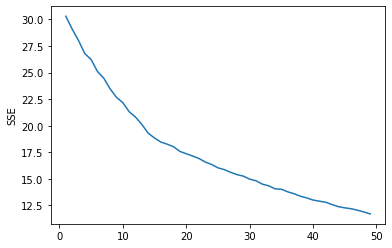

In [154]:
from matplotlib import pyplot as plt
#plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng_ny, sse_ny)

In [166]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ny_merged = ny_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
ny_merged = ny_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ny_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,5,Pharmacy,Deli / Bodega,Donut Shop,Sandwich Place,Dessert Shop
1,Bronx,Co-op City,40.874294,-73.829939,5,Fast Food Restaurant,Bus Station,Park,Discount Store,Pharmacy
2,Bronx,Eastchester,40.887556,-73.827806,5,Bus Station,Caribbean Restaurant,Deli / Bodega,Diner,Bus Stop
3,Bronx,Fieldston,40.895437,-73.905643,13,Plaza,Medical Supply Store,River,Bus Station,Fish & Chips Shop
4,Bronx,Riverdale,40.890834,-73.912585,13,Park,Baseball Field,Moving Target,Playground,Plaza


In [167]:
ny_merged['Cluster Labels'].unique()

array([ 5, 13,  7, 12, 11,  6,  4,  2,  0,  1,  3, 14,  8,  9, 10])

In [168]:
ny_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,5,Pharmacy,Deli / Bodega,Donut Shop,Sandwich Place,Dessert Shop
1,Bronx,Co-op City,40.874294,-73.829939,5,Fast Food Restaurant,Bus Station,Park,Discount Store,Pharmacy
2,Bronx,Eastchester,40.887556,-73.827806,5,Bus Station,Caribbean Restaurant,Deli / Bodega,Diner,Bus Stop
3,Bronx,Fieldston,40.895437,-73.905643,13,Plaza,Medical Supply Store,River,Bus Station,Fish & Chips Shop
4,Bronx,Riverdale,40.890834,-73.912585,13,Park,Baseball Field,Moving Target,Playground,Plaza


### visualize the resulting clusters

In [169]:
# create map
ny_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_merged['Latitude'], ny_merged['Longitude'], ny_merged['Neighborhood'], ny_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(ny_map_clusters)
       
ny_map_clusters

In [47]:
url2 = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = urllib.request.urlopen(url2)

In [48]:
from bs4 import BeautifulSoup

In [49]:
soup = BeautifulSoup(page, 'lxml')

### Print the raw format of webpage

In [50]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"X-tt4ApAIC8AAA5wivIAAAAC","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":995657573,"wgRevisionId":995657573,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communications in Ontar

### Find all tables from the webpage

In [51]:
all_tables = soup.find_all('table')
all_tables

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Postal Code
 </th>
 <th>Borough
 </th>
 <th>Neighbourhood
 </th></tr>
 <tr>
 <td>M1A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M2A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M3A
 </td>
 <td>North York
 </td>
 <td>Parkwoods
 </td></tr>
 <tr>
 <td>M4A
 </td>
 <td>North York
 </td>
 <td>Victoria Village
 </td></tr>
 <tr>
 <td>M5A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Regent Park, Harbourfront
 </td></tr>
 <tr>
 <td>M6A
 </td>
 <td>North York
 </td>
 <td>Lawrence Manor, Lawrence Heights
 </td></tr>
 <tr>
 <td>M7A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Queen's Park, Ontario Provincial Government
 </td></tr>
 <tr>
 <td>M8A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M9A
 </td>
 <td>Etobicoke
 </td>
 <td>Islington Avenue, Humber Valley Village
 </td></tr>
 <tr>
 <td>M1B
 </td>
 <td>Scarborough
 </td>
 <td>Malvern, Rouge
 </td></tr>
 <tr>
 <td>M2B

### Select the table with class 'wikitable sortable'

In [52]:
right_table = soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td

### Convert the html table to python lists

In [53]:
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells) == 3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

### Combine all lists into a Pandas Dataframe

In [54]:
toronto_df = pd.DataFrame(A, columns=['Postal_Code'])
toronto_df['Borough'] = B
toronto_df['Neighbourhood'] = C
toronto_df.head()

,Postal_Code,Borough,Neighbourhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"


In [55]:
toronto_df.shape

(180, 3)

### Replace "\n" from each element of dataframe

In [56]:
toronto_df = toronto_df.replace('\n', '', regex=True)
toronto_df.head()

,Postal_Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### Remove all rows where Borough is Not assigned

In [57]:
df_to1 = toronto_df[toronto_df['Borough'] != 'Not assigned']
df_to1.head()

,Postal_Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


### Get all rows where Neighbourhood is Not assigned

In [59]:
df_to1.loc[toronto_df['Neighbourhood'] == 'Not assigned']

,Postal_Code,Borough,Neighbourhood


## Shape of Dataframe

In [60]:
df_to1.shape

(103, 3)

### Download the csv file for latitude and longitude values

In [61]:
df_coord = pd.read_csv('Desktop\\DS Practice\\Geospatial_Coordinates.csv')
df_coord.head()

,Postal_Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Merge original df with df_coord on column 'Postal_Code'

In [62]:
df_to2 = pd.merge(df_to1, df_coord, on='Postal_Code')
df_to2.head()

,Postal_Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


### We want to know the number of Postal Codes, Boroughs and Neighborhoods

In [63]:
print('The dataframe has {} PostalCodes, {} boroughs and {} neighborhoods.'.format(
        len(df_to2['Postal_Code'].unique()),
        len(df_to2['Borough'].unique()),
        df_to2.shape[0]
    )
)

The dataframe has 103 PostalCodes, 10 boroughs and 103 neighborhoods.


### Get latitude and longitude of Toronto

In [64]:
address_to = 'Toronto'

geolocator_to = Nominatim(user_agent="ny_explorer")
location_to = geolocator.geocode(address_to)
latitude_to = location_to.latitude
longitude_to = location_to.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_to, longitude_to))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Create a map of Toronto with neighborhoods superimposed on top

In [65]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude_to, longitude_to], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood, postal_code in zip(df_to2['Latitude'], df_to2['Longitude'], df_to2['Borough'], df_to2['Neighbourhood'], df_to2['Postal_Code']):
    label_to = '{}, {}, {}'.format(neighbourhood, borough, postal_code)
    label_to = folium.Popup(label_to, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label_to,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## We will work only with boroughs that contain the word Toronto

### First, lets check the unique boroughs

In [66]:
df_to2['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

### Now, create a new df containing only those rows where Borough has the word Toronto

In [67]:
df_to3 = df_to2.loc[(df_to2.Borough == 'Downtown Toronto') | (df_to2.Borough == 'East Toronto') | (df_to2.Borough == 'West Toronto') | (df_to2.Borough == 'Central Toronto')]
df_to3.head()

,Postal_Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [68]:
df_to3.reset_index(inplace = True)

### Lets map only df_to3

In [115]:
# create map of Toronto using latitude and longitude values
map_toronto_new = folium.Map(location=[latitude_to, longitude_to], zoom_start=10)

# add markers to map as per df3
for lat1, lng1, borough1, neighbourhood1, postal_code1 in zip(df_to3['Latitude'], df_to3['Longitude'], df_to3['Borough'], df_to3['Neighbourhood'], df_to3['Postal_Code']):
    label_to2 = '{}, {}, {}'.format(neighbourhood1, borough1, postal_code1)
    label_to2 = folium.Popup(label_to2, parse_html=True)
    folium.CircleMarker(
        [lat1, lng1],
        radius=5,
        popup=label_to2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_new)  
    
map_toronto_new

### Explore the first neighborhood in df3

In [70]:
df_to3.loc[0, 'Neighbourhood']

'Regent Park, Harbourfront'

In [71]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list_to=[]
    for name, lat3, lng3 in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url_to3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat3, 
            lng3, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url_to3).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list_to.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_to = pd.DataFrame([item for venue_list in venues_list_to for item in venue_list])
    nearby_venues_to.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_to)

### Let's get top 100 Venues

In [72]:
Toronto_venues = getNearbyVenues(names=df_to3['Neighbourhood'],
                                   latitudes=df_to3['Latitude'],
                                   longitudes=df_to3['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport


In [73]:
print(Toronto_venues.shape)
Toronto_venues.head()

(1611, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.628841,-79.520999,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.628841,-79.520999,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.628841,-79.520999,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.628841,-79.520999,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
4,"Regent Park, Harbourfront",43.628841,-79.520999,Body Blitz Spa East,43.654735,-79.359874,Spa


In [74]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,57,57,57,57,57,57
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",17,17,17,17,17,17
Central Bay Street,62,62,62,62,62,62
Christie,15,15,15,15,15,15
Church and Wellesley,76,76,76,76,76,76
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,35,35,35,35,35,35


### Analyze Each Neighborhood

In [76]:
# one hot encoding
to_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns2 = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns2]

to_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [77]:
to_onehot.shape

(1611, 232)

### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [78]:
to_grouped = to_onehot.groupby('Neighborhood').mean().reset_index()
to_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.035088,0.000000,0.000000,0.00,0.017544,0.017544,0.000000,0.035088,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.017544,0.017544,0.000000,0.000000,0.000000,0.000000,0.035088,0.000000,0.000000,0.000000,0.000000,0.017544,0.052632,0.087719,0.00000,0.000000,0.000000,0.00000,0.00,0.000000,0.017544,0.000000,0.017544,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.00,0.01754

In [79]:
to_grouped.shape

(39, 232)

### Print each neighborhood along with the top 5 most common venues

In [80]:
to_num_top_venues = 5

for hood in to_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = to_grouped[to_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(to_num_top_venues))
    print('\n')

----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1    Cocktail Bar  0.05
2        Beer Bar  0.04
3  Farmers Market  0.04
4      Restaurant  0.04


----Brockton, Parkdale Village, Exhibition Place----
                   venue  freq
0                   Café  0.12
1            Coffee Shop  0.08
2         Breakfast Spot  0.08
3  Performing Arts Venue  0.08
4                 Bakery  0.08


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                venue  freq
0         Yoga Studio  0.06
1                 Spa  0.06
2       Garden Center  0.06
3              Garden  0.06
4  Light Rail Station  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3   Harbor / Marina  0.06
4           Airport  0.06


----Central Bay Street----
                venue  freq
0 

### Put that into a pandas dataframe

In [81]:
indicators = ['st2', 'nd2', 'rd2']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(to_num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
to_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
to_neighborhoods_venues_sorted['Neighborhood'] = to_grouped['Neighborhood']

for ind in np.arange(to_grouped.shape[0]):
    to_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(to_grouped.iloc[ind, :], to_num_top_venues)

to_neighborhoods_venues_sorted.head()

,Neighborhood,1st2 Most Common Venue,2nd2 Most Common Venue,3rd2 Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Farmers Market,Seafood Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Bakery,Coffee Shop,Performing Arts Venue
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Auto Workshop,Comic Shop,Park,Pizza Place
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Rental Car Location
4,Central Bay Street,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Burger Joint


### Cluster Neighborhoods

In [82]:
# set number of clusters
kclusters = 5

to_grouped_clustering = ny_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 2, 2, 2, 2, 2, 1])

In [86]:
# add clustering labels
#to_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

to_merged = df_to3

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(to_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

to_merged.head() # check the last columns!

,index,Postal_Code,Borough,Neighbourhood,Latitude,Longitude,1st2 Most Common Venue,2nd2 Most Common Venue,3rd2 Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Coffee Shop,Pub,Bakery,Park,Theater
1,4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Coffee Shop,Sushi Restaurant,Music Venue,Sandwich Place,Burrito Place
2,9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Clothing Store,Coffee Shop,Cosmetics Shop,Middle Eastern Restaurant,Café
3,15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,Coffee Shop,Café,Gastropub,Cocktail Bar,American Restaurant
4,19,M4E,East Toronto,The Beaches,43.676357,-79.293031,Pub,Health Food Store,Coffee Shop,Trail,Department Store


In [95]:
# create map
to_map_clusters = folium.Map(location=[latitude_to, longitude_to], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, in zip(to_merged['Latitude'], to_merged['Longitude'], to_merged['Neighbourhood']):
    label = folium.Popup(str(poi) + ' Cluster ', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(to_map_clusters)
       
to_map_clusters